In [1]:
# Import the necessary modules
#For Deep Learning
from tensorflow import keras as keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization, Convolution2D, Normalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from keras import callbacks
from keras.callbacks import EarlyStopping
#For graph display
from IPython.display import clear_output
#For data visualisation and manipulation
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#For splitting datasets and 
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
#Load in the training data (Drop rows that have values missing for PM25)
train_data=pd.read_csv(r'C:\Users\paraicoreilly\Desktop\project_code\PM\all_data_organised.csv')
#test_data = pd.read_csv(r'C:\Users\paraicoreilly\Desktop\project_code\PM\PM25_test.csv')
train_data.dropna(axis=0, inplace=True)
#test_data.dropna(axis=0, inplace=True)

In [3]:
print(train_data['PM25'].describe())

# Outlier detection
up_p = train_data['PM25'].mean() + 2*train_data['PM25'].std()
low_p = train_data['PM25'].mean() - 2*train_data['PM25'].std()
# Replace outlier by interpolation for base consumption
train_data.loc[train_data['PM25'] > up_p, 'PM25'] = np.nan
train_data.loc[train_data['PM25'] < low_p, 'PM25'] = np.nan
train_data['PM25'].interpolate(inplace=True)
train_data.dropna(axis=0, inplace=True)

print(train_data.describe())

count    3302.000000
mean       10.280389
std         8.899069
min        -0.200000
25%         5.000000
50%         7.300000
75%        12.200000
max       107.700000
Name: PM25, dtype: float64
              PM25         temp        r_hum         wdsp          msl
count  3301.000000  3301.000000  3301.000000  3301.000000  3301.000000
mean      9.154197     9.435232    83.034838    10.697849  1013.272645
std       5.699262     4.628457     7.247644     4.309118    12.030600
min      -0.200000    -8.100000    54.000000     2.300000   960.000000
25%       5.000000     6.100000    78.100000     7.500000  1006.000000
50%       7.300000     9.500000    83.200000     9.900000  1014.000000
75%      11.900000    13.200000    88.300000    13.300000  1021.000000
max      28.000000    21.100000   100.000000    28.800000  1042.000000


In [4]:
#Define the target and identify the features you will train on
y = train_data.PM25
y.describe()
features = ['temp','wdsp','r_hum','msl']
#Read in features
X = train_data[features]

#Split training data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 42,test_size=.2)

In [5]:
# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(train_X)
# output_scaler = scaler_y.fit(train_y)
# Apply the scaler to training data
# train_y_norm = output_scaler.transform(train_y)
train_x_norm = input_scaler.transform(train_X)
# Apply the scaler to test data
# test_y_norm = output_scaler.transform(val_y)
test_x_norm = input_scaler.transform(val_X)

In [6]:
#Define the model
# create a sequential model
model = Sequential()

model.add(Dense(500, activation='relu',input_shape=(4,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.05))


model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(.05))

model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

#model.add(Dropout(.05))

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))


model.add(Dense(1, activation='linear'))
# # compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')


In [7]:
#pltCallBack = PlotLossAccuracy()
early_stopping = EarlyStopping(
    min_delta =0.0001, # minimium amount of change to count as an improvement
    patience = 5, # how many epochs to wait before stopping
    restore_best_weights = True,
)

In [8]:
#Fit the model
history = model.fit(
    train_X, train_y,
    validation_data=(val_X,val_y),
    batch_size=16,
    epochs=500,  
    callbacks=[early_stopping]
)

Epoch 1/500
165/165 [==============================] - 4s 9ms/step - loss: 43.1869 - val_loss: 28.7688
Epoch 2/500
165/165 [==============================] - 1s 6ms/step - loss: 33.2899 - val_loss: 28.2097
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 33.3968 - val_loss: 30.4041
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 32.8749 - val_loss: 28.0018
Epoch 5/500
165/165 [==============================] - 1s 6ms/step - loss: 32.8037 - val_loss: 27.5195
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 31.5617 - val_loss: 26.6269
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 30.3965 - val_loss: 25.7497
Epoch 8/500
165/165 [==============================] - 1s 5ms/step - loss: 28.6916 - val_loss: 22.9782
Epoch 9/500
165/165 [==============================] - 1s 5ms/step - loss: 26.2119 - val_loss: 34.2289
Epoch 10/500
165/165 [==============================] - 1s 5ms/step - los

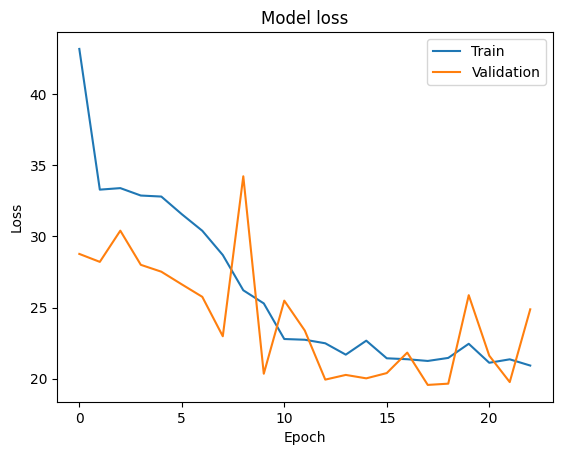

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
# y_test = scaler_y.inverse_transform(val_y)
# y_train = scaler_y.inverse_transform(train_y)

In [11]:
#Show the results for the validation set
val_pred = model.predict(val_X)
# val_pred = scaler_y.inverse_transform(val_pred)

# calculate metrics
mae = mean_absolute_error(val_y, val_pred)
mse = mean_squared_error(val_y, val_pred)
r2 = r2_score(val_y, val_pred)
variability = mae/8.889

#Print metrics
print('Metrics for the validation set:\n')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Variability', variability)
print('R^2 Score:', r2)



21/21 [==============================] - 0s 2ms/step
Metrics for the validation set:

Mean Absolute Error: 3.229307126960081
Mean Squared Error: 19.555217236566577
Variability 0.3632925106266263
R^2 Score: 0.32155187687130693


21/21 [==============================] - 0s 2ms/step


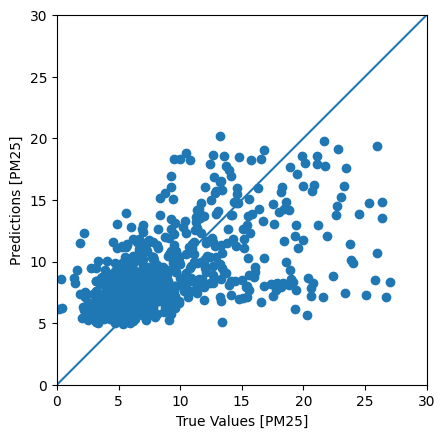

In [12]:
val_predictions = model.predict(val_X)
# val_pred = scaler_y.inverse_transform(val_pred)


a = plt.axes(aspect='equal')
plt.scatter(val_y, val_predictions.flatten())
plt.xlabel('True Values [PM25]')
plt.ylabel('Predictions [PM25]')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

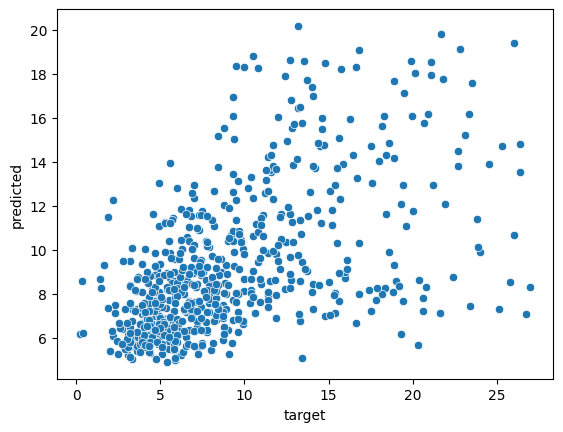

In [13]:
val_data = pd.DataFrame({'target': val_y, 'predicted': val_pred.flatten()})
# Plot the scatterplot using the combined DataFrame
sns.scatterplot(data=val_data, x='target', y='predicted')
plt.show()

In [14]:
#Load in the test data
test_data = pd.read_csv(r'C:\Users\paraicoreilly\Desktop\project_code\PM\PM25_test.csv')

up_p = test_data['PM25'].mean() + 2*test_data['PM25'].std()
low_p = test_data['PM25'].mean() - 2*test_data['PM25'].std()
# Replace outlier by interpolation for base consumption
test_data.loc[test_data['PM25'] > up_p, 'PM25'] = np.nan
test_data.loc[test_data['PM25'] < low_p, 'PM25'] = np.nan
test_data['PM25'].interpolate(inplace=True)
test_data.dropna(axis=0, inplace=True)

test_y = test_data.PM25
test_x2 = test_data[features]

test_x_norm2 = input_scaler.transform(test_x2)
# Apply the scaler to test data
# test_y_norm = output_scaler.transform(val_y)


In [15]:
test_pred = model.predict(test_x2)
# calculate metrics
mae = mean_absolute_error(test_y, test_pred)
mse = mean_squared_error(test_y, test_pred)
r2 = r2_score(test_y, test_pred)

12/12 [==============================] - 0s 2ms/step


In [16]:
print('Metrics for the test set:\n')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Metrics for the test set:

Mean Absolute Error: 4.274813759442334
Mean Squared Error: 26.235694074530503
R^2 Score: -0.5664294882532486


12/12 [==============================] - 0s 2ms/step


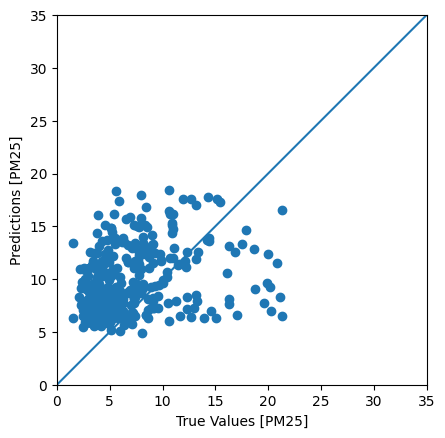

In [17]:
test_predictions = model.predict(test_x2).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('True Values [PM25]')
plt.ylabel('Predictions [PM25]')
lims = [0, 35]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [18]:
# test_data = pd.DataFrame({'target': test_y, 'predicted': test_pred.flatten()})
# # Plot the scatterplot using the combined DataFrame
# sns.scatterplot(data=test_data, x='target', y='predicted')
# plt.show()

              PM25         temp        r_hum          msl         wdsp
count  3346.000000  4017.000000  4017.000000  4017.000000  4017.000000
mean      9.072146    10.069380    83.063978  1013.714961     5.978591
std       8.482560     4.553028     7.447802    11.848927     2.598755
min       1.100000    -8.700000    49.000000   962.000000     1.000000
25%       4.200000     6.900000    78.000000  1006.000000     4.000000
50%       6.400000    10.300000    83.000000  1015.000000     6.000000
75%      11.000000    13.600000    88.000000  1022.000000     7.000000
max      86.000000    21.300000   100.000000  1043.000000    18.000000
              PM25         temp        r_hum          msl         wdsp
count  4017.000000  4017.000000  4017.000000  4017.000000  4017.000000
mean      8.619032    10.069380    83.063978  1013.714961     5.978591
std       5.531897     4.553028     7.447802    11.848927     2.598755
min       1.100000    -8.700000    49.000000   962.000000     1.000000
25%   

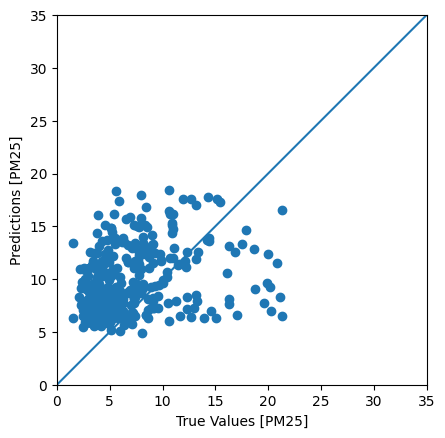

In [19]:
cork = pd.read_csv(r'C:\Users\paraicoreilly\Desktop\project_code\PM\All_Cork_Data.csv')

print(cork.describe())


up_p = cork['PM25'].mean() + 2*cork['PM25'].std()
low_p = cork['PM25'].mean() - 2*cork['PM25'].std()
# Replace outlier by interpolation for base consumption
cork.loc[cork['PM25'] > up_p, 'PM25'] = np.nan
cork.loc[cork['PM25'] < low_p, 'PM25'] = np.nan
cork['PM25'].interpolate(inplace=True)


cork.dropna(axis=0,inplace=True)
print(cork.describe())

#Load in the test data
testcork_y = cork.PM25
cork_features = ['temp','wdsp','r_hum','msl']
testcork_x = cork[cork_features]

c_train_X, c_val_X, c_train_y, c_val_y = train_test_split(testcork_x, testcork_y, random_state = 1,test_size=.8) 

#testcork_x_norm = input_scaler.transform()
# Apply the scaler to test data
# test_y_norm = output_scaler.transform(val_y)
# testcork_x_norm = input_scaler.transform(testcork_y)





# testcork_pred = model.predict(testcork_x_norm)

# # calculate metrics
# mae = mean_absolute_error(testcork_y, testcork_pred)
# mse = mean_squared_error(testcork_y, testcork_pred)
# r2 = r2_score(testcork_y, testcork_pred)

# print('Metrics for the test set:\n')
# print('Mean Absolute Error:', mae)
# print('Mean Squared Error:', mse)
# print('R^2 Score:', abs(r2))


xt = input_scaler.transform(c_val_X)
p = model.predict(xt).flatten()


a = plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('True Values [PM25]')
plt.ylabel('Predictions [PM25]')
lims = [0, 35]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)






In [20]:
# calculate metrics
mae = mean_absolute_error(test_y, test_pred)
mse = mean_squared_error(test_y, test_pred)
r2 = r2_score(test_y, test_pred)

In [21]:
print('Metrics for the test set:\n')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Metrics for the test set:

Mean Absolute Error: 4.274813759442334
Mean Squared Error: 26.235694074530503
R^2 Score: -0.5664294882532486
